### Bump test
* performed on 3/6/20, repeated 3 times.
* we examine force accuracy and repeatability

In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

In [3]:
start = Time('2020-03-06T13:41:30') #this is UTC
end = Time('2020-03-06T13:56:00') 

In [4]:
df = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

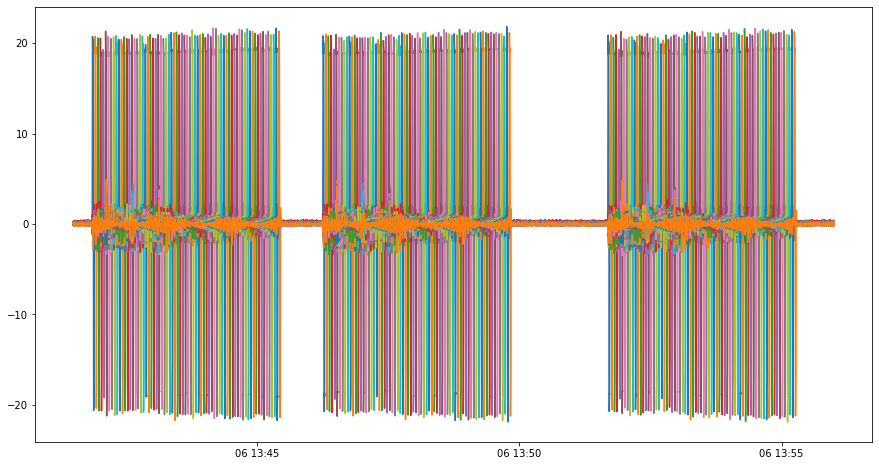

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(72):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['axialForceMeasured%d'%i]-df['axialForceMeasured%d'%i][0])

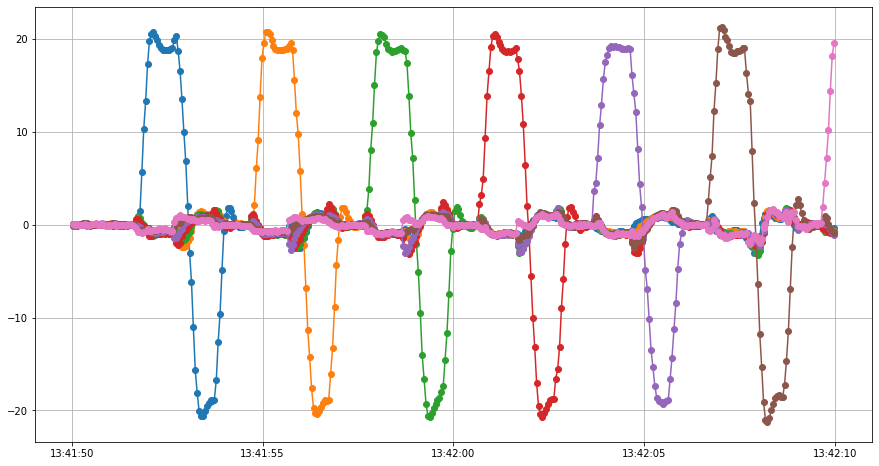

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(7):
    plt.plot(pd.to_datetime(df.private_sndStamp[400:800], unit='s'), 
             df['axialForceMeasured%d'%i][400:800]-df['axialForceMeasured%d'%i][0],'-o')
plt.grid()

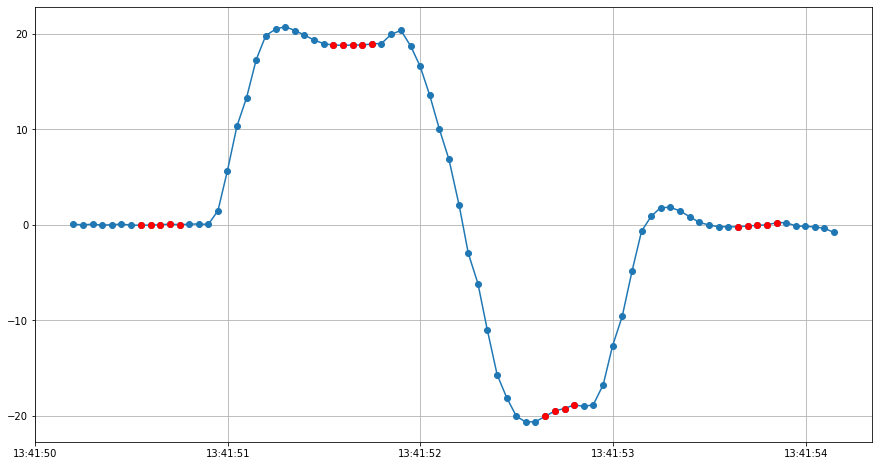

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[420:500], unit='s'), 
             df['axialForceMeasured%d'%i][420:500]-df['axialForceMeasured%d'%i][0],'-o')
plt.grid()
aa = np.array(df['axialForceMeasured%d'%i][420:500]-df['axialForceMeasured%d'%i][0])
i1 = np.argmax(aa>10)
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+10,i1+15)
idx2 = np.arange(i1+32, i1+36)
idx3 = np.arange(i1+52, i1+57)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+420], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+420], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+420], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+420], unit='s'), aa[idx3],'ro')

In [8]:
df = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

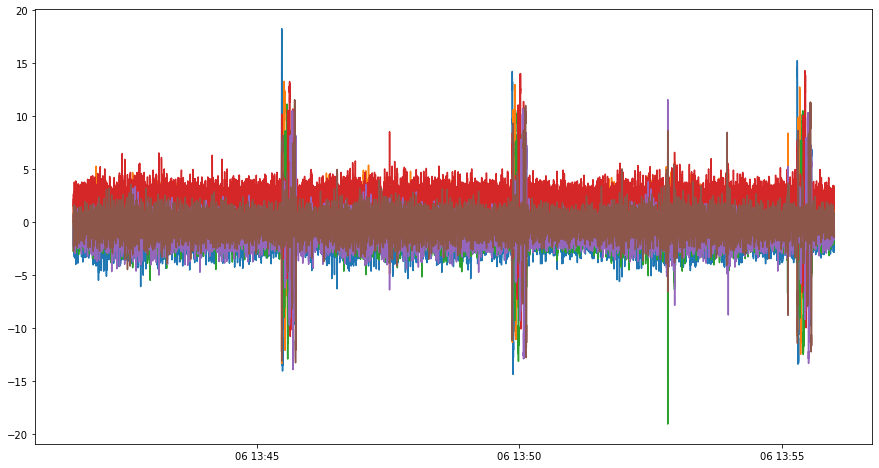

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)]-df['tangentLink%dDegForceMeasured'%(i*60)][0])

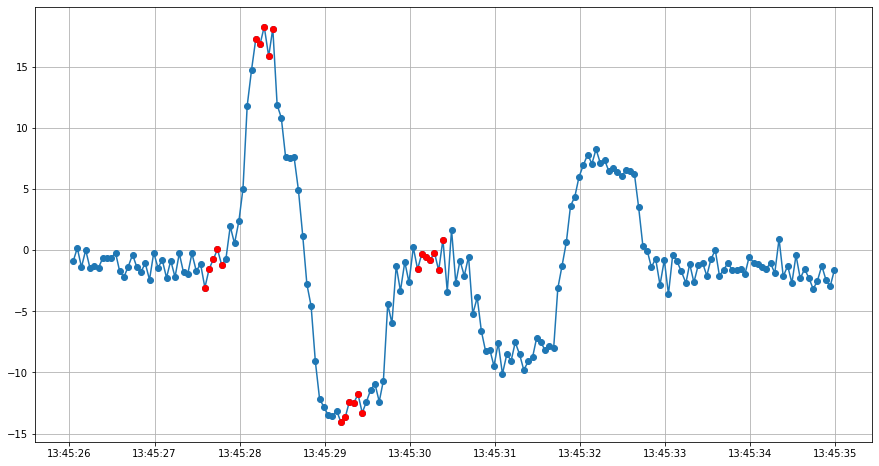

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[4720:4900], unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)][4720:4900]-df['tangentLink%dDegForceMeasured'%(i*60)][0],'-o')
plt.grid()
aa = np.array(df['tangentLink%dDegForceMeasured'%(i*60)][4720:4900]-df['tangentLink%dDegForceMeasured'%(i*60)][0])
i1 = np.argmax(aa>0.95*max(aa))-4
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+2,i1+7)
idx2 = np.arange(i1+22, i1+28)
idx3 = np.arange(i1+40, i1+47)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+4720], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+4720], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+4720], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+4720], unit='s'), aa[idx3],'ro');

### We make an array of 78x12 to hold the data
* each row is for an actuator
* each test gives 4 columns of data: before, +20N, -20N, and after
* we repeated the test 3 times

In [12]:
bump = np.zeros((78, 12))

In [13]:
print('the test took %.1f minute'%(3*78/60))

the test took 3.9 minute


In [14]:
for iround in range(3):
    if iround==0:
        start = Time('2020-03-06T13:41:30') #this is UTC
        end = Time('2020-03-06T13:46:00') 
    elif iround==1:
        start = Time('2020-03-06T13:46:00') #this is UTC
        end = Time('2020-03-06T13:51:00') 
    else:
        start = Time('2020-03-06T13:51:00') #this is UTC
        end = Time('2020-03-06T13:56:00') 
    dfa = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
    dft = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
    for i in range(78):
        if i<72:
            aa = np.array(dfa['axialForceMeasured%d'%i]-dfa['axialForceMeasured%d'%i][0])
            i1 = np.argmax(aa>10)
            idx0 = np.arange(i1-10,i1-5)
            idx1 = np.arange(i1+10,i1+15)
            idx2 = np.arange(i1+32, i1+36)
            idx3 = np.arange(i1+52, i1+57)
        else:
            aa = np.array(dft['tangentLink%dDegForceMeasured'%((i-72)*60)] - 
                          dft['tangentLink%dDegForceMeasured'%((i-72)*60)][0])
            i1 = i1 = np.argmax(aa>0.95*max(aa))-4
            idx0 = np.arange(i1-10,i1-5)
            idx1 = np.arange(i1+2,i1+7)
            idx2 = np.arange(i1+22, i1+28)
            idx3 = np.arange(i1+40, i1+47)

        bump[i,iround*4+0] = np.mean(aa[idx0])
        bump[i,iround*4+1] = np.mean(aa[idx1])
        bump[i,iround*4+2] = np.mean(aa[idx2])
        bump[i,iround*4+3] = np.mean(aa[idx3])
        #print(i, bump[i,iround*4+0:iround*4+4])

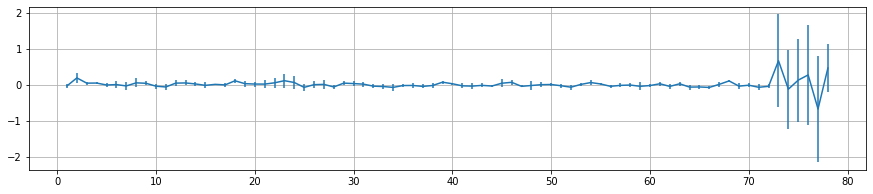

In [15]:
fig, ax = plt.subplots(figsize=(15,3))
x0 = np.arange(78)+1
idx = [0,3,4,7,8,11]
plt.errorbar(x0, np.mean(bump[:,idx], axis=1), np.std(bump[:,idx], axis=1))
plt.grid()

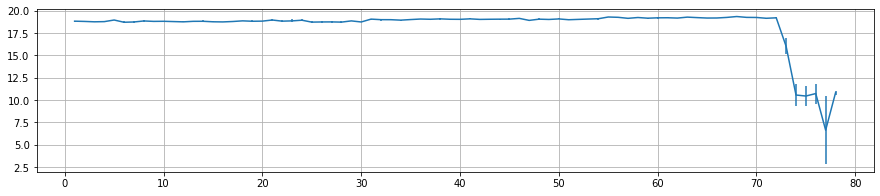

In [16]:
fig, ax = plt.subplots(figsize=(15,3))
x0 = np.arange(78)+1
idx = [1,5,9]
plt.errorbar(x0, np.mean(bump[:,idx], axis=1), np.std(bump[:,idx], axis=1))
plt.grid()

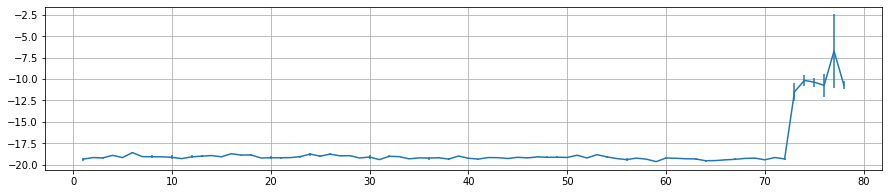

In [17]:
fig, ax = plt.subplots(figsize=(15,3))
x0 = np.arange(78)+1
idx = [2,6,10]
plt.errorbar(x0, np.mean(bump[:,idx], axis=1), np.std(bump[:,idx], axis=1))
plt.grid()